In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data set link :-https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view

In [71]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [72]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [73]:
# Selecting specific columns
selected_columns = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude',
                    'longitude', 'location', 'summary', 'attacktype1_txt', 'targtype1_txt', 'gname', 'motive',
                    'weaptype1_txt', 'nkill', 'nwound', 'addnotes']

# Creating a new DataFrame with selected columns
df_cleaned = df[selected_columns].copy()

# Renaming the columns for better readability
column_names = {
    'eventid': 'Event ID', 'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Country',
    'region_txt': 'Region', 'provstate': 'Province/State', 'city': 'City', 'latitude': 'Latitude',
    'longitude': 'Longitude', 'location': 'Location', 'summary': 'Summary', 'attacktype1_txt': 'Attack Type',
    'targtype1_txt': 'Target Type', 'gname': 'Group Name', 'motive': 'Motive', 'weaptype1_txt': 'Weapon Type',
    'nkill': 'Killed', 'nwound': 'Wounded', 'addnotes': 'Additional Notes'
}

df_cleaned.rename(columns=column_names, inplace=True)


In [74]:
df_cleaned

,Event ID,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Additional Notes
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,2.0,NaN
181687,201712310029,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,7.0,NaN
181688,201712310030,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,NaN
181689,201712310031,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0,NaN


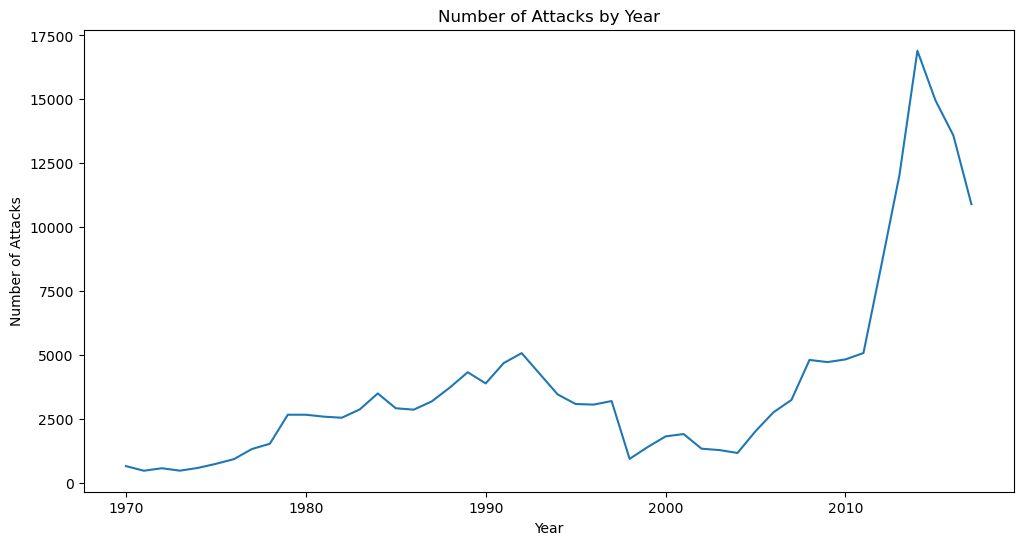

In [75]:
attacks_by_year = df_cleaned['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=attacks_by_year.index, y=attacks_by_year.values)
plt.title('Number of Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


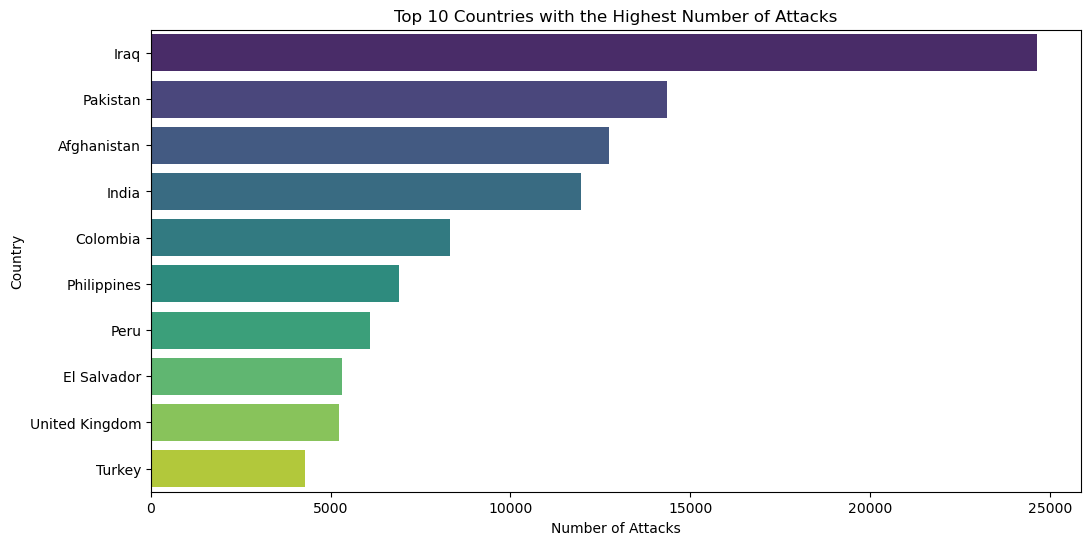

In [76]:
top_countries = df_cleaned['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with the Highest Number of Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.show()


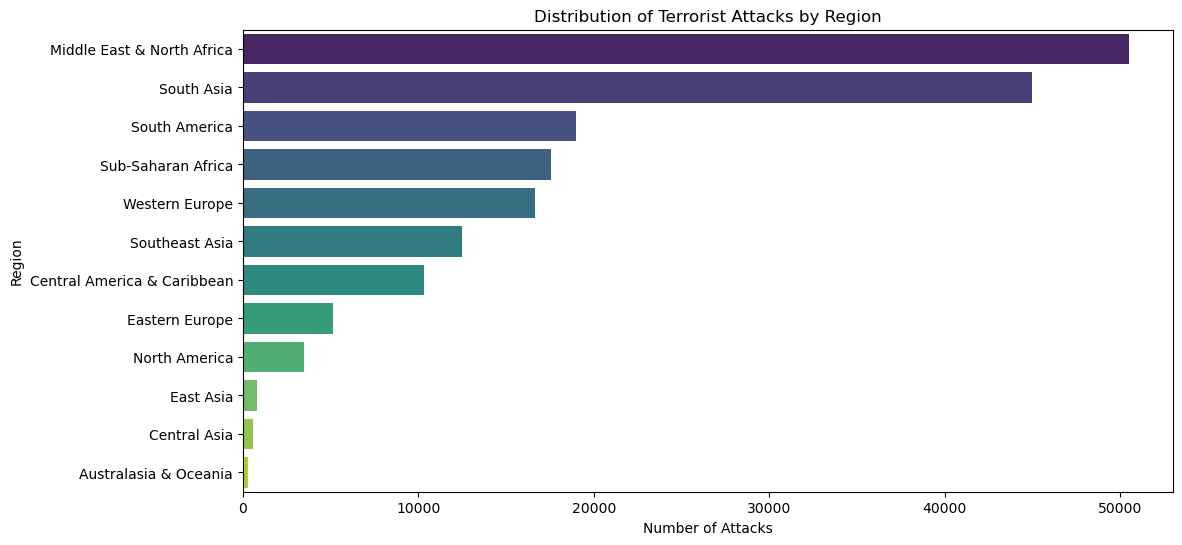

In [77]:
attacks_by_region = df_cleaned['Region'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=attacks_by_region.values, y=attacks_by_region.index, palette='viridis')
plt.title('Distribution of Terrorist Attacks by Region')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()


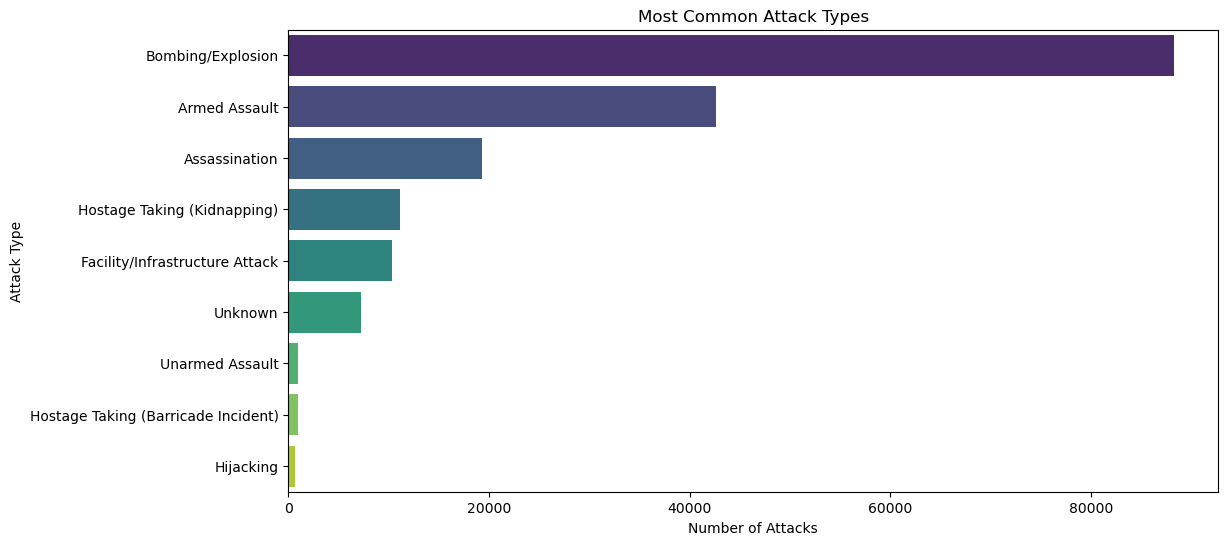

In [78]:
common_attack_types = df_cleaned['Attack Type'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=common_attack_types.values, y=common_attack_types.index, palette='viridis')
plt.title('Most Common Attack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()


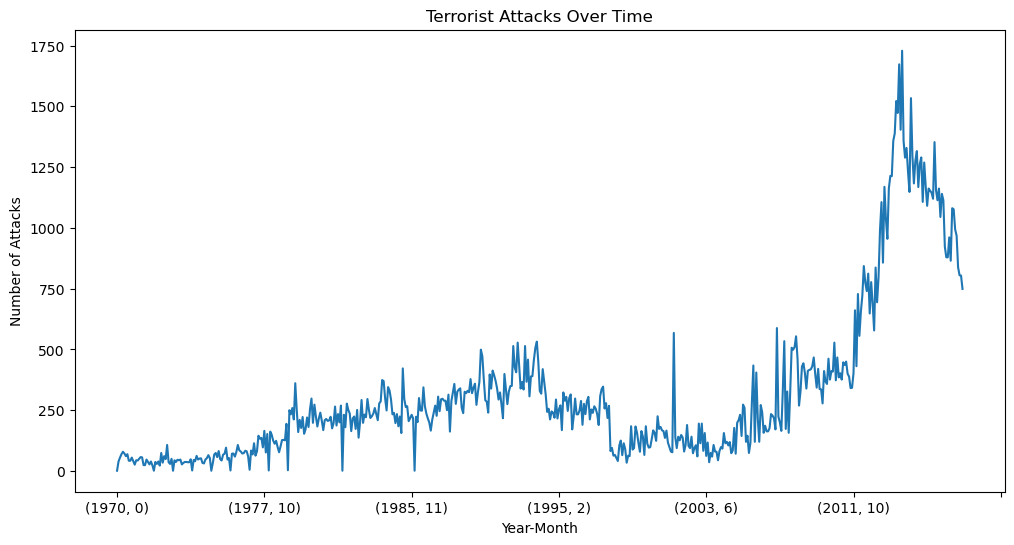

In [79]:
plt.figure(figsize=(12, 6))
df_cleaned.groupby(['Year', 'Month'])['Event ID'].count().plot()
plt.title('Terrorist Attacks Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Attacks')
plt.show()


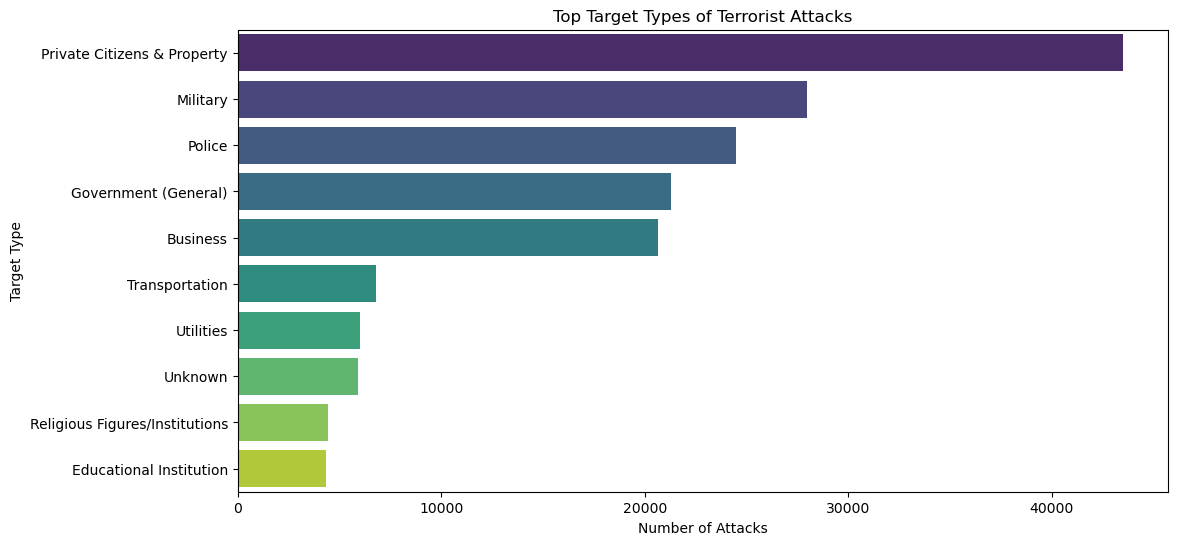

In [80]:
top_target_types = df_cleaned['Target Type'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_target_types.values, y=top_target_types.index, palette='viridis')
plt.title('Top Target Types of Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Target Type')
plt.show()


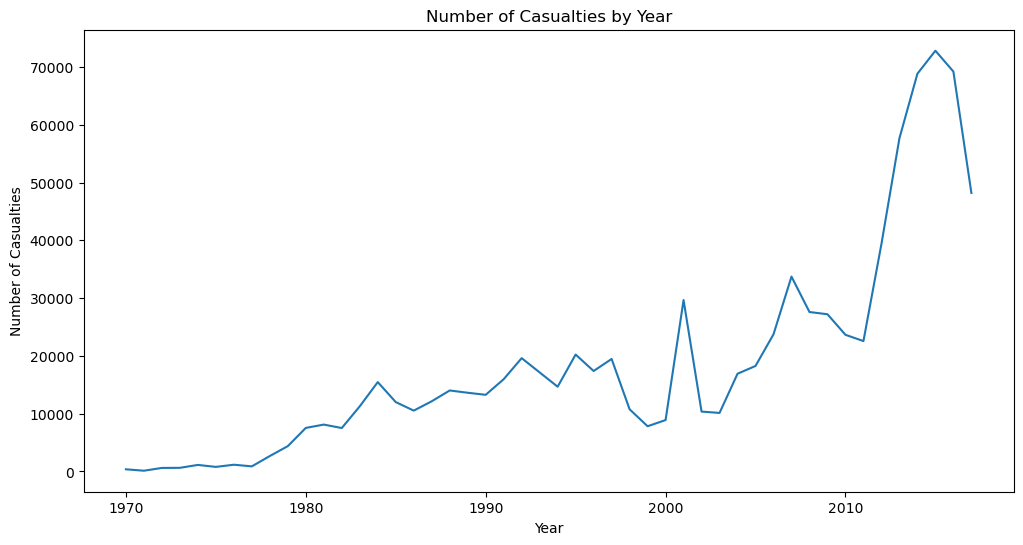

In [81]:
df_cleaned['Casualties'] = df_cleaned['Killed'] + df_cleaned['Wounded']
casualties_by_year = df_cleaned.groupby('Year')['Casualties'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=casualties_by_year.index, y=casualties_by_year.values)
plt.title('Number of Casualties by Year')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.show()


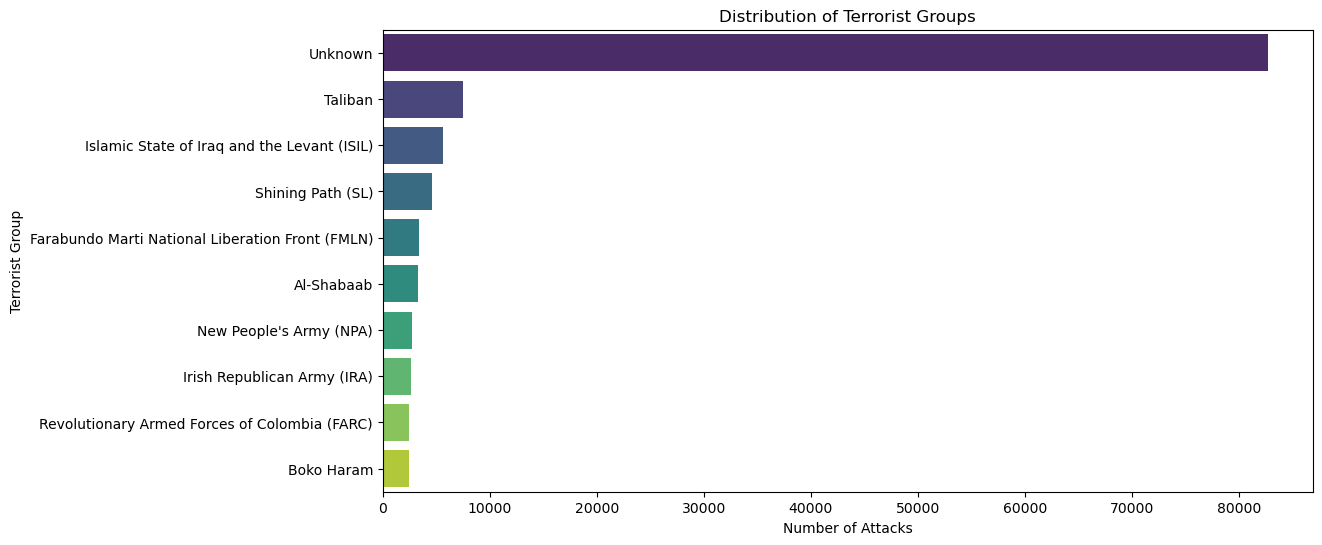

In [82]:
top_groups = df_cleaned['Group Name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_groups.values, y=top_groups.index, palette='viridis')
plt.title('Distribution of Terrorist Groups')
plt.xlabel('Number of Attacks')
plt.ylabel('Terrorist Group')
plt.show()


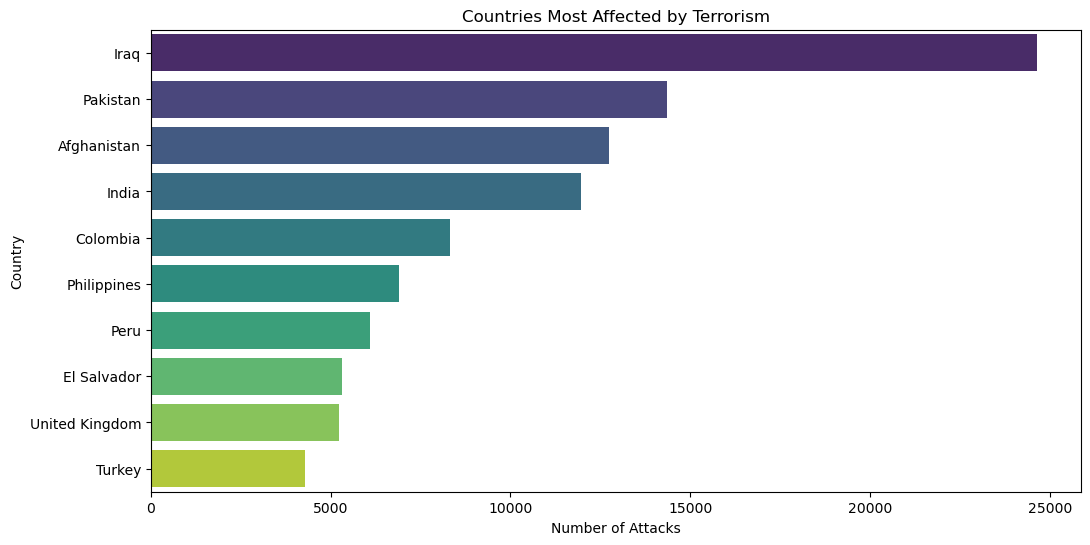

In [83]:
top_affected_countries = df_cleaned['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_affected_countries.values, y=top_affected_countries.index, palette='viridis')
plt.title('Countries Most Affected by Terrorism')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.show()


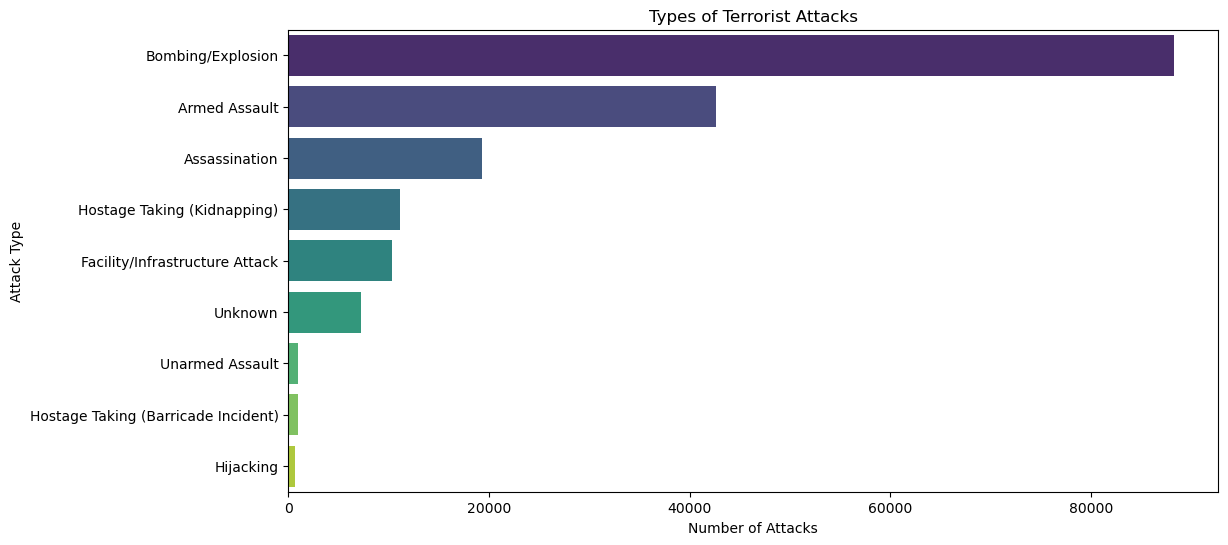

In [84]:
attack_types = df_cleaned['Attack Type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=attack_types.values, y=attack_types.index, palette='viridis')
plt.title('Types of Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()


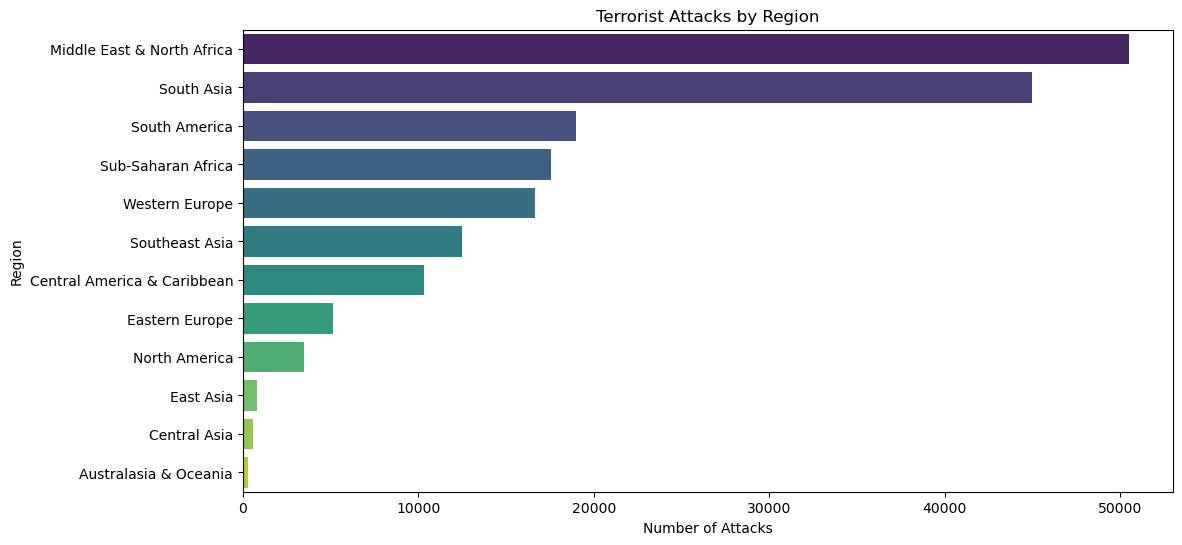

In [85]:
attacks_by_region = df_cleaned['Region'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=attacks_by_region.values, y=attacks_by_region.index, palette='viridis')
plt.title('Terrorist Attacks by Region')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()


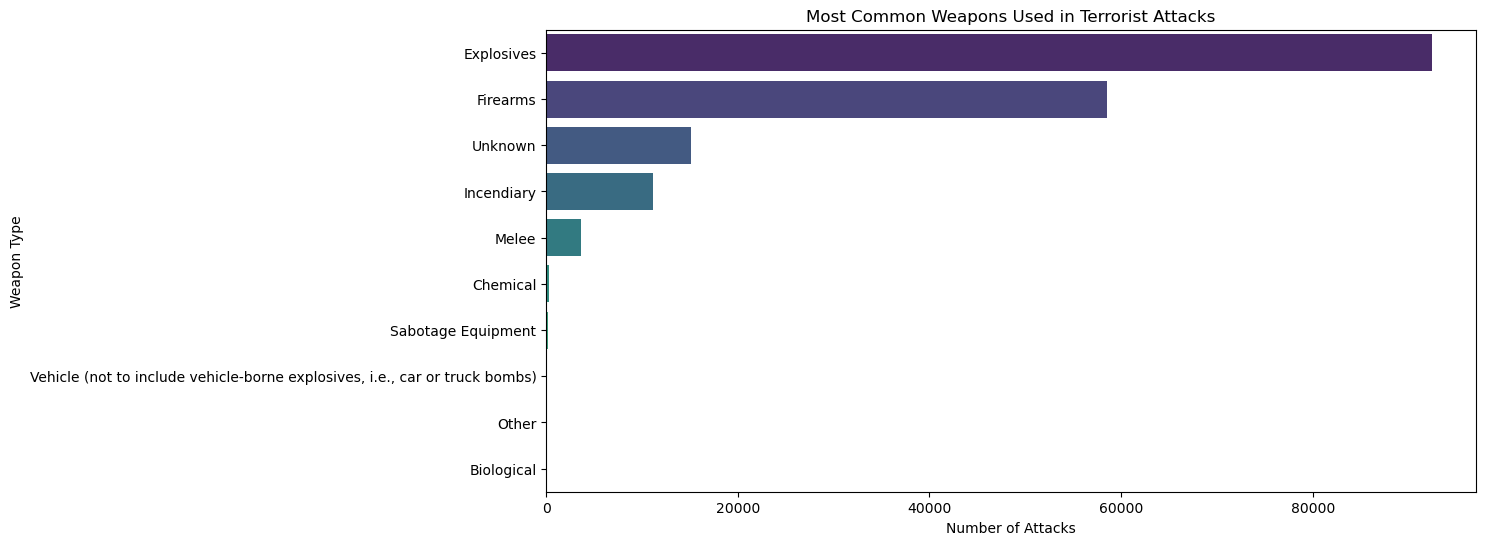

In [86]:
top_weapons = df_cleaned['Weapon Type'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_weapons.values, y=top_weapons.index, palette='viridis')
plt.title('Most Common Weapons Used in Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Weapon Type')
plt.show()


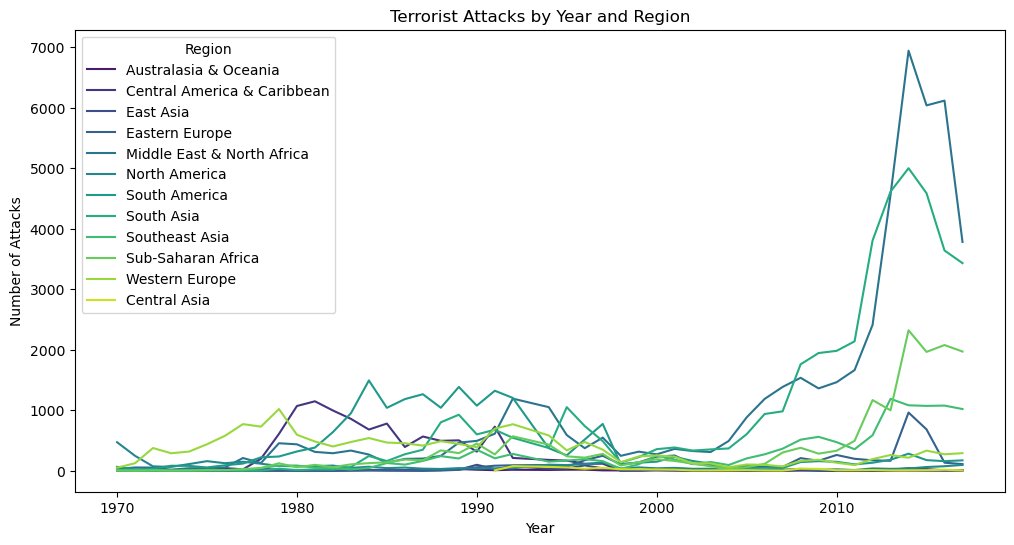

In [87]:
attacks_by_year_region = df_cleaned.groupby(['Year', 'Region']).size().reset_index(name='Attacks')

plt.figure(figsize=(12, 6))
sns.lineplot(data=attacks_by_year_region, x='Year', y='Attacks', hue='Region', palette='viridis')
plt.title('Terrorist Attacks by Year and Region')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


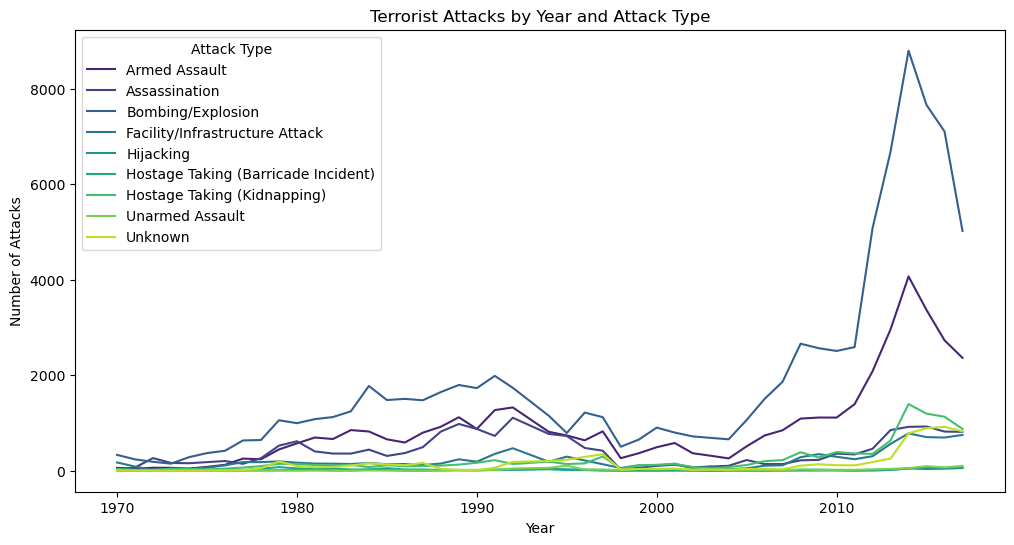

In [88]:
attacks_by_year_type = df_cleaned.groupby(['Year', 'Attack Type']).size().reset_index(name='Attacks')

plt.figure(figsize=(12, 6))
sns.lineplot(data=attacks_by_year_type, x='Year', y='Attacks', hue='Attack Type', palette='viridis')
plt.title('Terrorist Attacks by Year and Attack Type')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


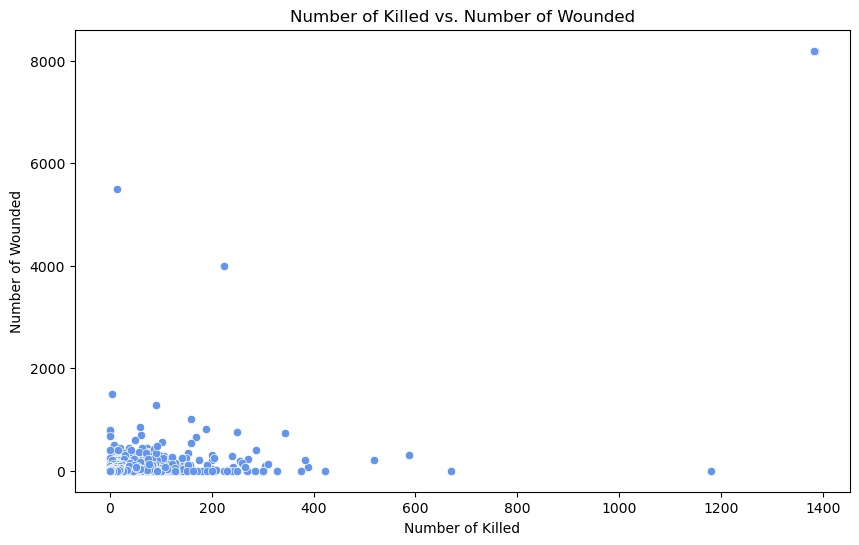

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Killed', y='Wounded', color='cornflowerblue')
plt.title('Number of Killed vs. Number of Wounded')
plt.xlabel('Number of Killed')
plt.ylabel('Number of Wounded')
plt.show()


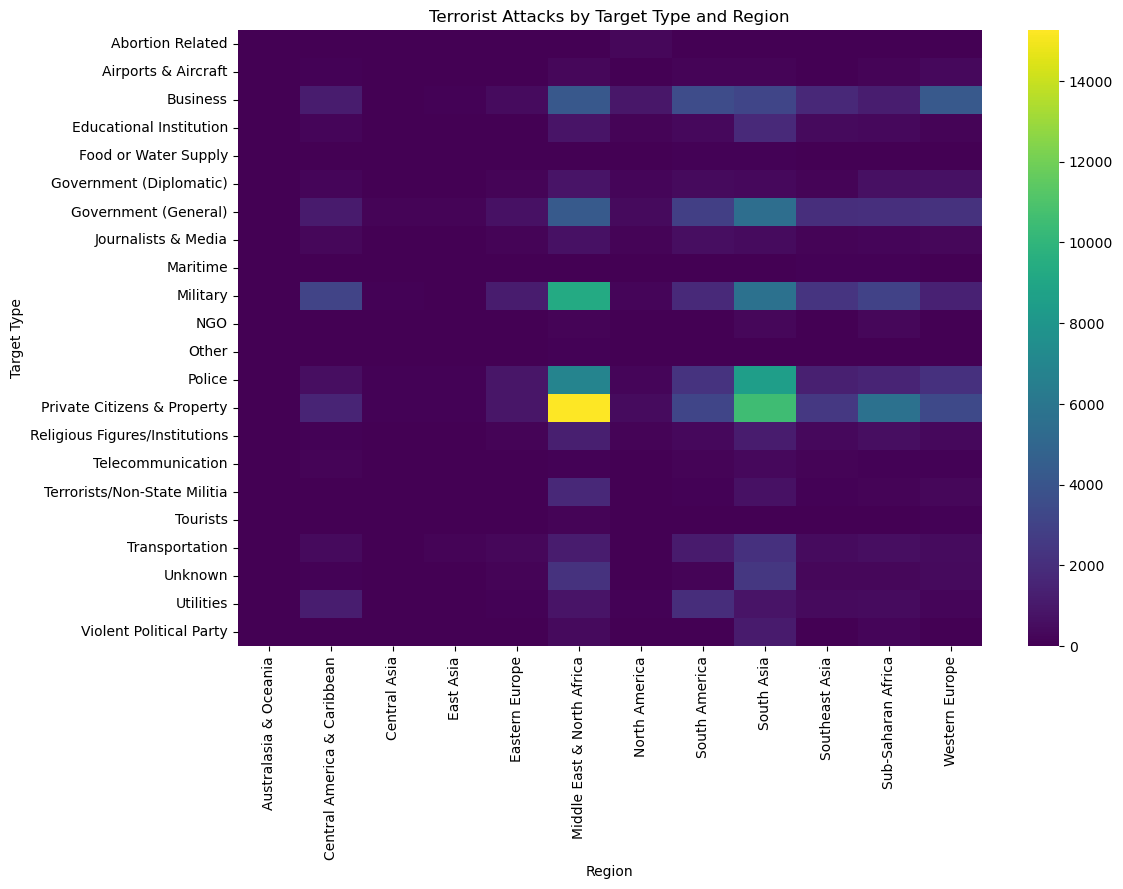

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(df_cleaned['Target Type'], df_cleaned['Region']), cmap='viridis')
plt.title('Terrorist Attacks by Target Type and Region')
plt.xlabel('Region')
plt.ylabel('Target Type')
plt.show()


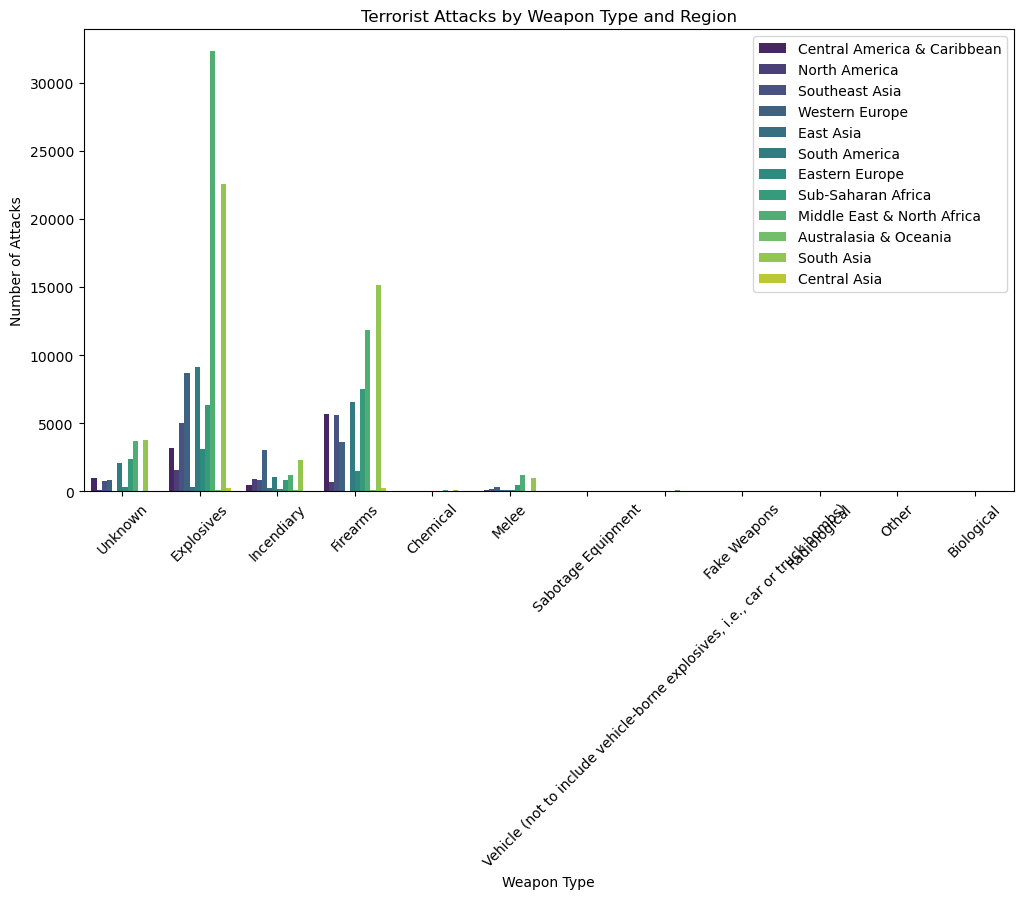

In [91]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Weapon Type', hue='Region', palette='viridis')
plt.title('Terrorist Attacks by Weapon Type and Region')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


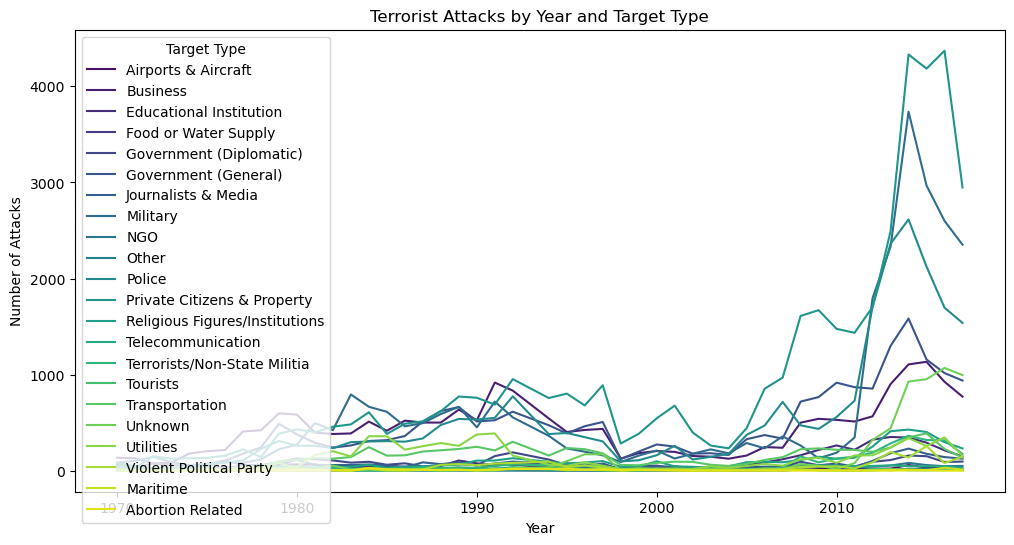

In [92]:
attacks_by_year_target = df_cleaned.groupby(['Year', 'Target Type']).size().reset_index(name='Attacks')

plt.figure(figsize=(12, 6))
sns.lineplot(data=attacks_by_year_target, x='Year', y='Attacks', hue='Target Type', palette='viridis')
plt.title('Terrorist Attacks by Year and Target Type')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


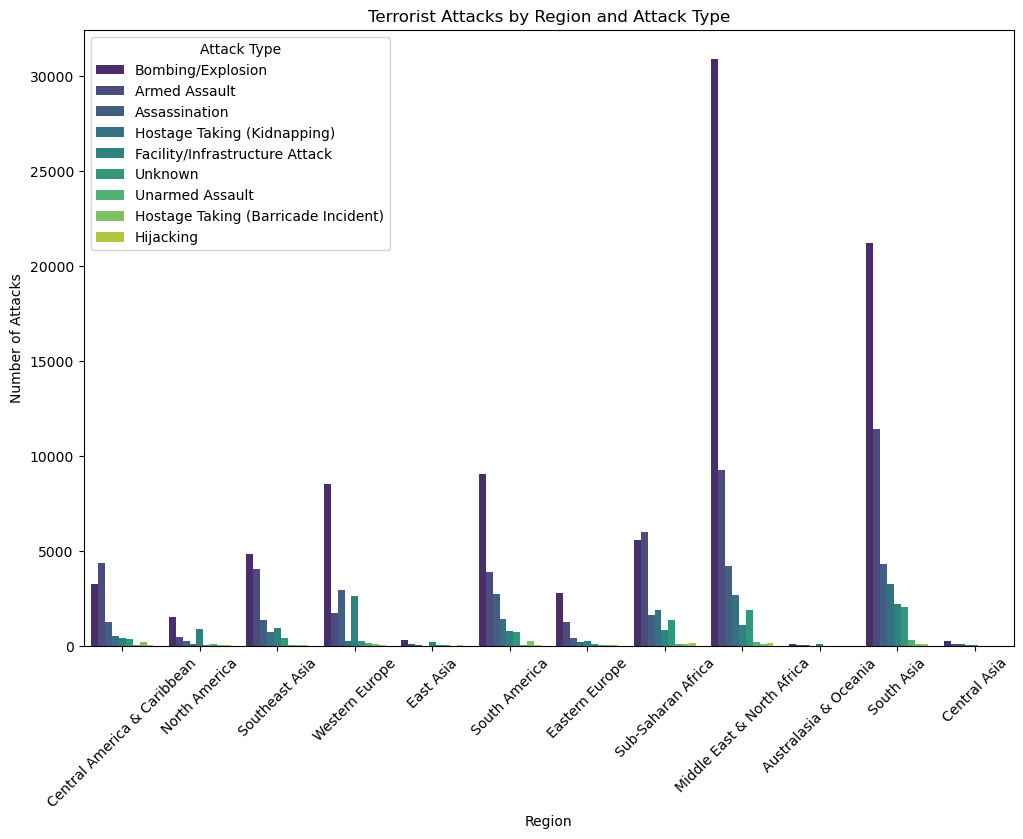

In [93]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, x='Region', hue='Attack Type', palette='viridis', hue_order=df_cleaned['Attack Type'].value_counts().index)
plt.title('Terrorist Attacks by Region and Attack Type')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.show()


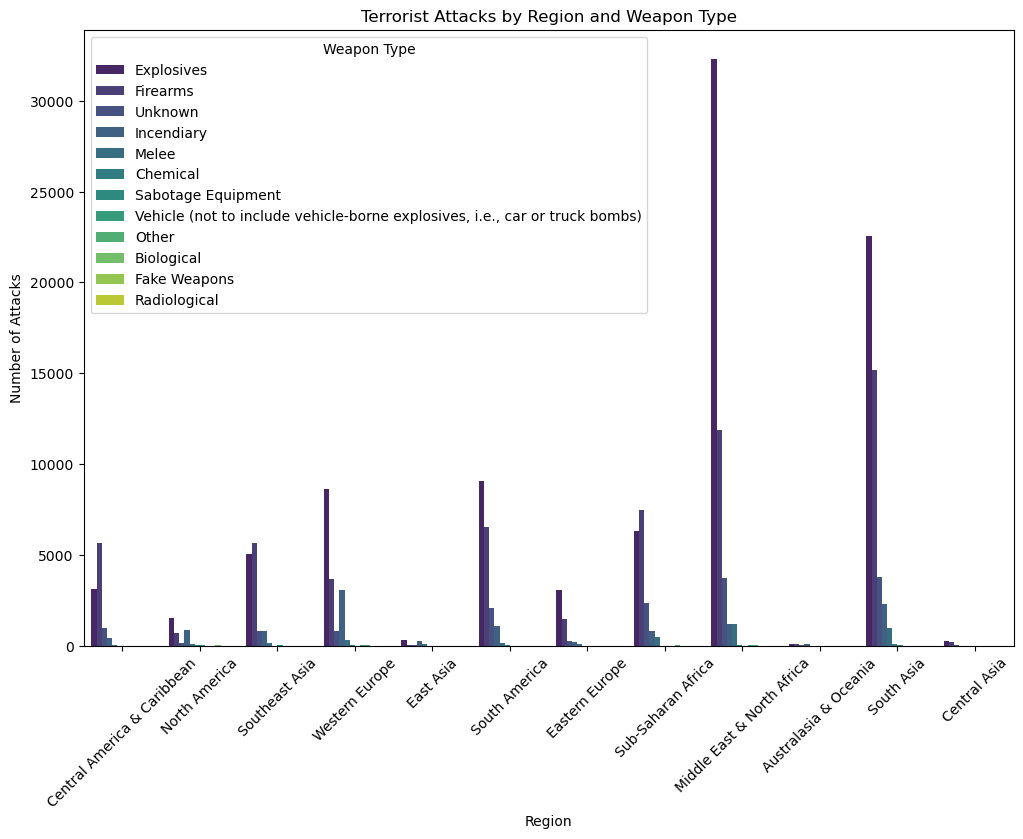

In [94]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, x='Region', hue='Weapon Type', palette='viridis', hue_order=df_cleaned['Weapon Type'].value_counts().index)
plt.title('Terrorist Attacks by Region and Weapon Type')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Weapon Type')
plt.show()


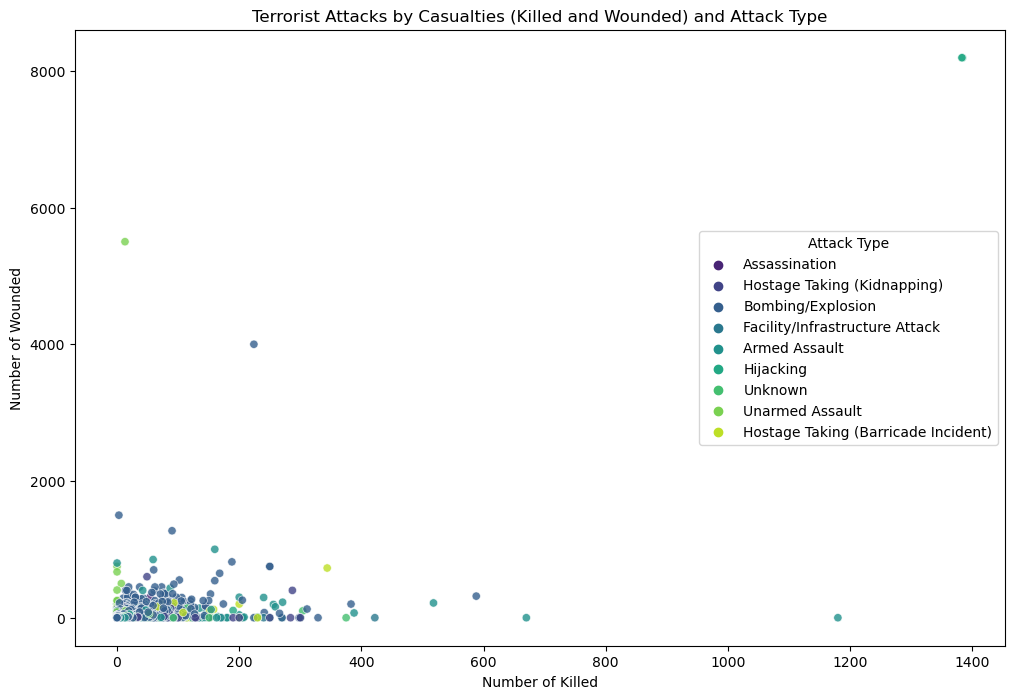

In [42]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='Killed', y='Wounded', hue='Attack Type', palette='viridis', alpha=0.8)
plt.title('Terrorist Attacks by Casualties (Killed and Wounded) and Attack Type')
plt.xlabel('Number of Killed')
plt.ylabel('Number of Wounded')
plt.legend(title='Attack Type')
plt.show()


In [101]:
# Calculate the total harm caused by each group:
# Sum the number of killed (nkill) and wounded (nwound) for each group.
# Create a new column called "Total Harm" that represents the combined harm caused by each group.

df_cleaned['Total Harm'] = df_cleaned['Killed'] + df_cleaned['Wounded']
df_cleaned['Total Harm']

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
181686    3.0
181687    9.0
181688    0.0
181689    0.0
181690    0.0
Name: Total Harm, Length: 181691, dtype: float64

In [103]:
# Categorize the groups based on their level of harm:
# Determine the threshold values that define high-harm and low-harm groups. For example, you can consider the top 10% of groups with the highest total harm as high-harm groups and the bottom 10% as low-harm groups.
# Assign labels to the groups based on their total harm values.

harm_threshold = df_cleaned['Total Harm'].quantile(0.9)  # Adjust the quantile as per your preference

df_cleaned['Harm Level'] = np.where(df_cleaned['Total Harm'] >= harm_threshold, 'High Harm', 'Low Harm')
df_cleaned['Harm Level']

0         Low Harm
1         Low Harm
2         Low Harm
3         Low Harm
4         Low Harm
            ...   
181686    Low Harm
181687    Low Harm
181688    Low Harm
181689    Low Harm
181690    Low Harm
Name: Harm Level, Length: 181691, dtype: object

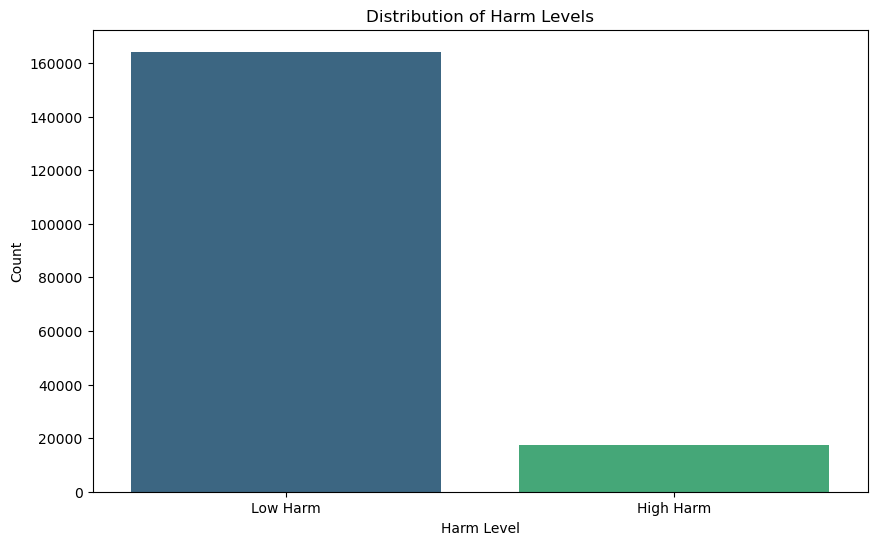

In [104]:
# Analyze and visualize the groups based on their harm level:
# You can now analyze and compare the high-harm and low-harm groups based on various features, such as attack type, target type, region, etc.
# Use visualizations like bar plots, pie charts, or stacked bar charts to showcase the distribution and characteristics of the high-harm and low-harm groups.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Harm Level', palette='viridis')
plt.title('Distribution of Harm Levels')
plt.xlabel('Harm Level')
plt.ylabel('Count')
plt.show()


In [108]:
df_cleaned.columns

Index(['Event ID', 'Year', 'Month', 'Day', 'Country', 'Region',
       'Province/State', 'City', 'Latitude', 'Longitude', 'Location',
       'Summary', 'Attack Type', 'Target Type', 'Group Name', 'Motive',
       'Weapon Type', 'Killed', 'Wounded', 'Additional Notes', 'Casualties',
       'Total Harm', 'Harm Level'],
      dtype='object')

In [113]:
# Calculate total harm (sum of killed and wounded)
df_cleaned['Total Harm'] = df_cleaned['Killed'] + df_cleaned['Wounded']

# Calculate harm rate
df_cleaned['Harm Rate'] = df_cleaned['Total Harm'] / df_cleaned['Event ID'].nunique()

harm_rate_by_country = df_cleaned.groupby('Country')['Harm Rate'].mean().sort_values(ascending=False)


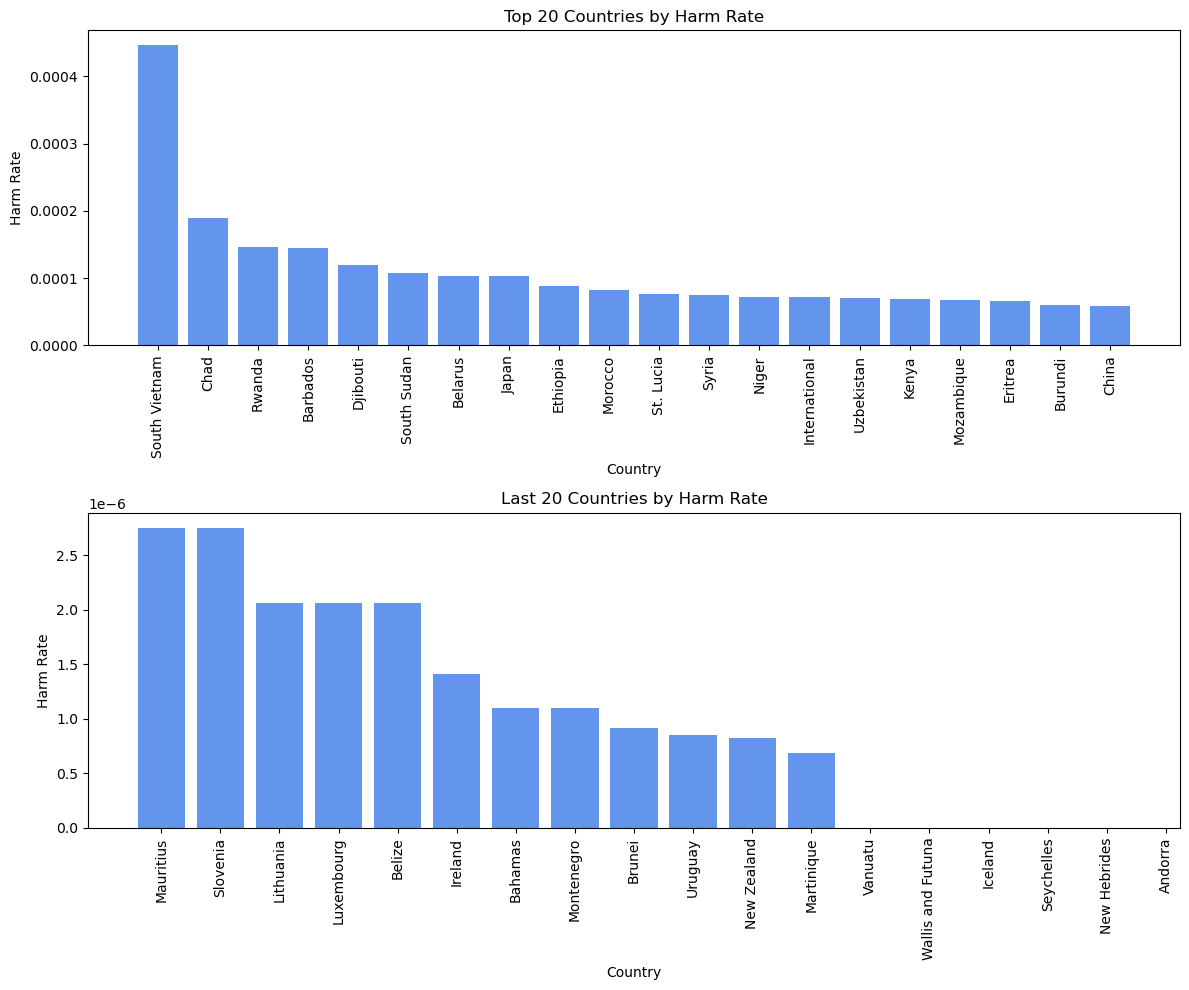

In [117]:

# Select top 20 and last 20 countries
top_20_countries = harm_rate_by_country.head(20)
last_20_countries = harm_rate_by_country.tail(20)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for top 20 countries
ax1.bar(top_20_countries.index, top_20_countries.values, color='cornflowerblue')
ax1.set_title('Top 20 Countries by Harm Rate')
ax1.set_xlabel('Country')
ax1.set_ylabel('Harm Rate')
ax1.tick_params(axis='x', rotation=90)

# Plot for last 20 countries
ax2.bar(last_20_countries.index, last_20_countries.values, color='cornflowerblue')
ax2.set_title('Last 20 Countries by Harm Rate')
ax2.set_xlabel('Country')
ax2.set_ylabel('Harm Rate')
ax2.tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [118]:
df_cleaned

,Event ID,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,...,Group Name,Motive,Weapon Type,Killed,Wounded,Additional Notes,Casualties,Total Harm,Harm Level,Harm Rate
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,...,MANO-D,NaN,Unknown,1.0,0.0,NaN,1.0,1.0,Low Harm,0.000006
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,...,23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0.0,0.0,Low Harm,0.000000
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,...,Unknown,NaN,Unknown,1.0,0.0,NaN,1.0,1.0,Low Harm,0.000006
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,...,Unknown,NaN,Explosives,NaN,NaN,NaN,NaN,NaN,Low Harm,NaN
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,...,Unknown,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,Low Harm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,...,Al-Shabaab,NaN,Firearms,1.0,2.0,NaN,3.0,3.0,Low Harm,0.000017
181687,201712310029,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,...,Muslim extremists,NaN,Explosives,2.0,7.0,NaN,9.0,9.0,Low Harm,0.000050
181688,201712310030,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,...,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,NaN,0.0,0.0,Low Harm,0.000000
181689,201712310031,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,...,Unknown,NaN,Explosives,0.0,0.0,NaN,0.0,0.0,Low Harm,0.000000


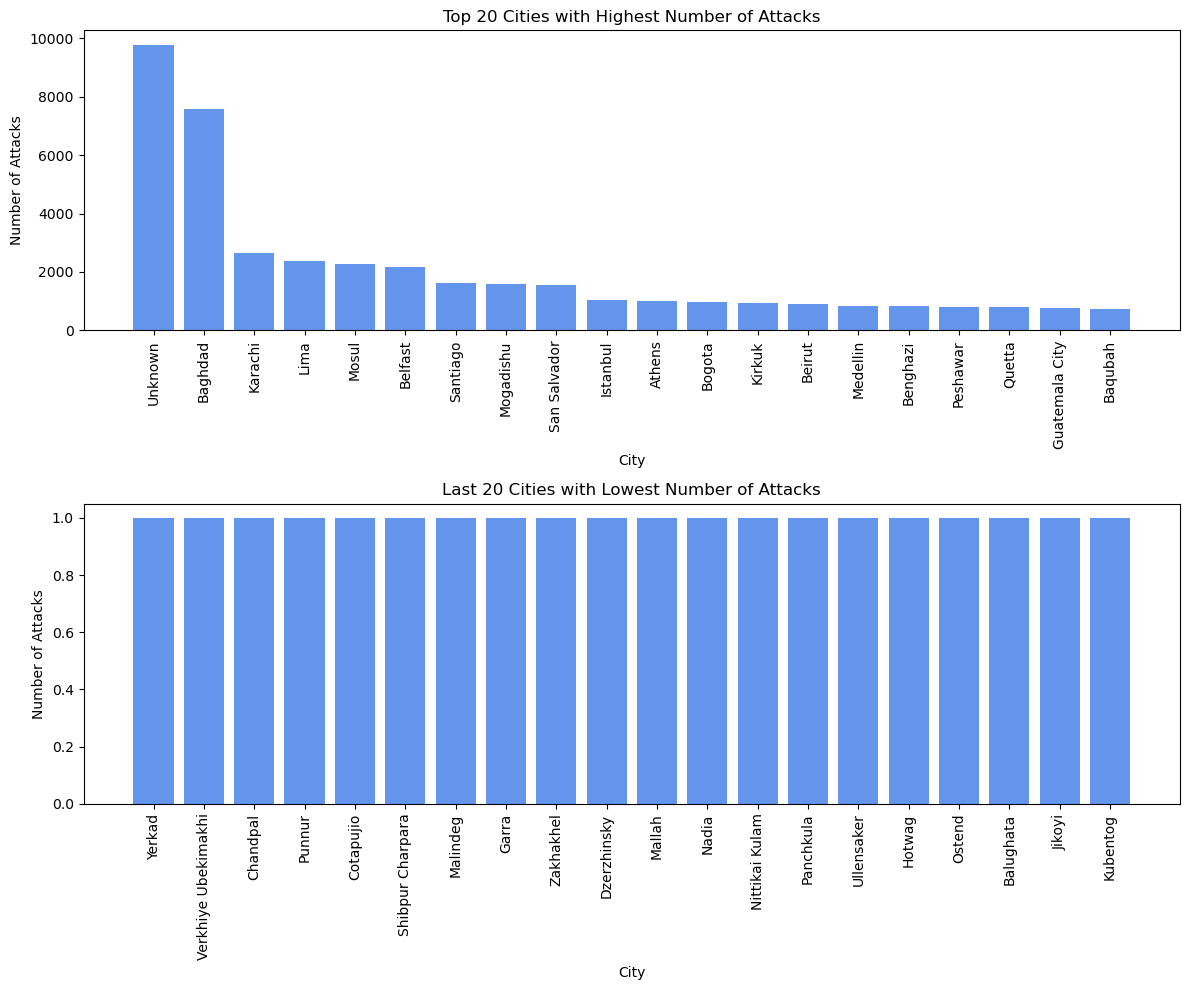

In [131]:

# Calculate the number of attacks per city
attacks_by_city = df_cleaned['City'].value_counts()

# Select top 20 and last 20 cities
top_20_cities = attacks_by_city.head(20)
last_20_cities = attacks_by_city.tail(20)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for top 20 cities
ax1.bar(top_20_cities.index, top_20_cities.values, color='cornflowerblue')
ax1.set_title('Top 20 Cities with Highest Number of Attacks')
ax1.set_xlabel('City')
ax1.set_ylabel('Number of Attacks')
ax1.tick_params(axis='x', rotation=90)

# Plot for last 20 cities
ax2.bar(last_20_cities.index, last_20_cities.values, color='cornflowerblue')
ax2.set_title('Last 20 Cities with Lowest Number of Attacks')
ax2.set_xlabel('City')
ax2.set_ylabel('Number of Attacks')
ax2.tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


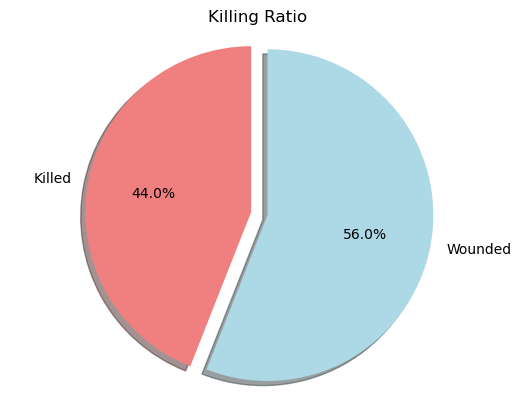

In [121]:
# Calculate the total number of killed and casualties
total_killed = df_cleaned['Killed'].sum()
total_casualties = df_cleaned['Killed'].sum() + df_cleaned['Wounded'].sum()

# Calculate the killing ratio
killing_ratio = total_killed / total_casualties

# Create a pie chart to visualize the killing ratio
labels = ['Killed', 'Wounded']
sizes = [total_killed, total_casualties - total_killed]
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)  # Explode the "Killed" slice for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Killing Ratio')

plt.show()


Total Casualties:  935737.0


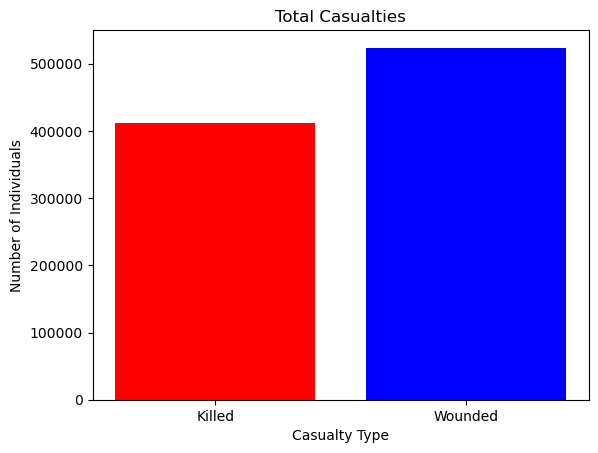

In [122]:
import matplotlib.pyplot as plt

# Calculate the total number of killed and wounded
total_killed = df_cleaned['Killed'].sum()
total_wounded = df_cleaned['Wounded'].sum()

# Calculate the total number of casualties
total_casualties = total_killed + total_wounded

# Print the total number of casualties
print("Total Casualties: ", total_casualties)

# Create a bar chart to visualize the number of casualties
labels = ['Killed', 'Wounded']
values = [total_killed, total_wounded]
colors = ['red', 'blue']

plt.bar(labels, values, color=colors)
plt.title('Total Casualties')
plt.xlabel('Casualty Type')
plt.ylabel('Number of Individuals')
plt.show()
